# Project: The Offensive and Toxic Comments Detection Project

## Table of Contents

- <a href='#intro'>1. Project Overview and Objectives</a> 
    - <a href='#dataset'>1.1. Data Set Description</a>
- <a href="#wrangling">2. Data Wrangling</a>
    - <a href='#wranglingEnglish'>2.1.  English DataSet</a>
- <a href="#eda">3. Exploratory Data Analysis</a>
     - <a href='#explorEnglish'>3.1.  English DataSet</a>
- <a href='#pre'>4. Preprocessing DataSet</a>
    - <a href='#preEnglish'>4.1.  English DataSet</a>
- <a href='#rnn'>5. RNN Model</a>
    - <a href='#apply'>5.1. Apply</a>
    - <a href='#build'>5.2. Model Building</a>
        - <a href='#buildEnglish'>5.2.1.  English DataSet</a>
    - <a href='#perf'>5.3. Model Performance</a>
        - <a href='#preformancenglish'>5.3.1.  English DataSet</a>
    - <a href='#tensor'>5.4. Convert Model Keras To TensorFlow</a>
        - <a href='#convertenglish'>5.4.1.  English DataSet</a>
- <a href='#concl'>. Conclusions</a>

<a id='intro'></a>
## Project Overview and Objectives

***
Posting offensive or abusive content on social media have been a serious concern in recent years, and the usage of bad words and aggressive words has been increased significantly, The young population is playing a major role in it. Cyberbullying affects more than half of the young population using social media. Insults in social media websites create negative interactions within the network.  This has created a lot of problems because of the huge popularity and usage of social media sites like Facebook and Twitter. Discussing things you care about can be difficult. The threat of abuse and harassment online means that many people stop expressing themselves and give up on seeking different opinions. so we decided to make our application special so The main motivation lies in the fact that our model will automate and accelerate the detection of the posted offensive content and toxic comments to improve online conversation. NLP techniques and sentiment analysis with the help of Machine Learning / Deep learning models, is used for analyzing the social comment and identified the aggressive effect of an individual or a group. An effective model acts as the core component in a final prototype system that can detect cyberbullying on social media.
Developing a system to detect online offensive language is very difficult and important to the health and the security of online users. Studies have shown that cyberhate, online harassment and other misuses of technology are on the rise. Particularly during the global Coronavirus pandemic in 2020, 35% reported online harassment related to their identity-based characteristics, which is a 3% increase over 2019.
Applying advanced techniques from the Natural Language Processing (NLP) field to support the development of an online hate free community is a critical task for social justice. Transfer learning enhances the performance of the model by allowing the transfer of knowledge from one domain or one dataset to others that have not been seen before, thus, supporting the model to be more generalizable. In our project.
***

<a id='dataset'></a>
## Data Set Description

It conists of two classes:
* `Not Offensive` -   encoded as `0`
* `Offensive` -   encoded as `1`

In [1]:
plt.title("Show Common Words")
 

''

# Importing libraries

In [2]:
import numpy as np 
import pandas as pd 
import os
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import xgboost as xgb
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding,SpatialDropout1D
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint ,ReduceLROnPlateau ,EarlyStopping
from tensorflow import keras
from tensorflow import lite
import json
import pickle
from wordcloud import WordCloud
from sklearn.metrics import confusion_matrix,precision_score,recall_score,classification_report, accuracy_score
import pandas as pd
import numpy as np
import re
import string
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
import codecs
from bidi.algorithm import get_display
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
#from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

<a id='wrangling'></a>
## Data Wrangling

### General Properties

<a id='wranglingEnglish'></a>
### English DataSet

#### Gathering Data

In [3]:
df_twitter = pd.read_csv("../input/englishoffensivedataset/train.csv")
df_offensive = pd.read_csv("../input/englishoffensivedataset/labeled_data.csv")

#### View information of data

In [4]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [5]:
df_offensive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


#### View missing data

In [6]:
print('Twitter')
df_twitter.isnull().sum()

Twitter


id       0
label    0
tweet    0
dtype: int64

In [7]:
print('Offensive')
df_offensive.isnull().sum()

Offensive


Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

#### View duplicated data

In [8]:
sum(df_twitter.duplicated())

0

In [9]:
sum(df_offensive.duplicated())

0

#### View  DataSet

In [10]:
df_twitter.head(5)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [11]:
df_offensive.head(5)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


<a id='pre'></a>
## Preprocessing DataSet

<a id='preEnglish'></a>
### English DataSet

In [12]:
df_twitter.drop('id',axis=1,inplace=True)
df_offensive.drop(['Unnamed: 0','count','hate_speech','offensive_language','neither'],axis=1,inplace=True)
df_offensive['class'].unique()

array([2, 1, 0])

In [13]:
df_offensive[df_offensive['class']==0]['class']=1
df_offensive['class'].unique()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array([2, 1, 0])

In [14]:
df_offensive["class"].replace({0: 1}, inplace=True)
df_offensive['class'].unique()

array([2, 1])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


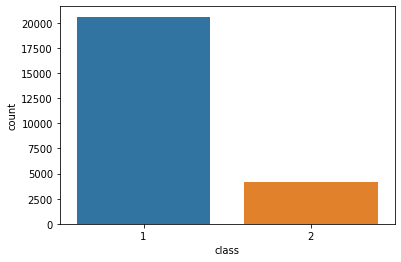

In [15]:
sns.countplot('class',data=df_offensive);

In [16]:
df_offensive["class"].replace({2: 0}, inplace=True)
df_offensive['class'].unique()

array([0, 1])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


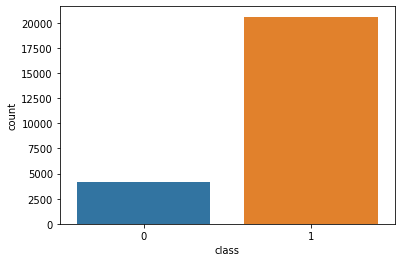

In [17]:
sns.countplot('class',data=df_offensive);

In [18]:
df_offensive.rename(columns ={'class':'label'}, inplace = True)

In [19]:
df_offensive.iloc[5]['tweet']

'!!!!!!!!!!!!!!!!!!"@T_Madison_x: The shit just blows me..claim you so faithful and down for somebody but still fucking with hoes! &#128514;&#128514;&#128514;"'

##### We will concat two DataSet ( df_twitter , df_offensive )

In [20]:
df = pd.concat([df_twitter,df_offensive])

#### View information of data

<a id='eda'></a>
## Exploratory Data Analysis

<a id='explorEnglish'></a>
### English DataSet

In [59]:
stopword=set(stopwords.words('english'))
def clean_text(text):
    text = text.replace('user','')
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    return text

In [60]:
text_tweet = df['tweet'].apply(clean_text)

In [ ]:
unique_string=(" ").join(text_tweet)
#create and generate a word cloud image
wordcloud = WordCloud(width=800,height=600,min_font_size=14).generate(unique_string)
#display the generated image
plt.figure(figsize=(15,15))
plt.title("Show Common Words", fontsize=40) 
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file('intro.png')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


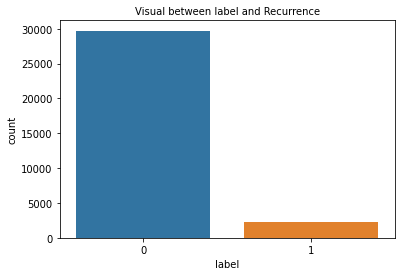

In [24]:
plt.title("Visual between label and Recurrence", fontsize=10) 
sns.countplot('label',data=df_twitter);

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


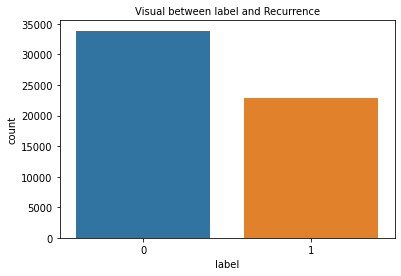

In [25]:
plt.title("Visual between label and Recurrence", fontsize=10) 
sns.countplot('label',data=df);

<a id='pre'></a>
## Preprocessing Text For Model

<a id='prepromodelEnglish'></a>
### English DataSet

In [26]:
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

In [27]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [lemmatizer.lemmatize(word) for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    return text

In [28]:
df['tweet']=df['tweet'].apply(clean_text)

#### View  DataSet

In [29]:
df['tweet'].head(5)

0     user father dysfunctional selfish drag kid dy...
1    user user thanks lyft credit cant use cause do...
2                                       bihday majesty
3    model   love u take u time urð± ððð...
4                     factsguide society    motivation
Name: tweet, dtype: object

<a id='rnn'></a>
## RNN Model

<a id='apply'></a>
## Apply

<a id='RNNEnglish'></a>
### English DataSet

In [30]:
x=df['tweet']
y=df['label']

In [31]:
x_trainEN, x_testEN, y_trainEN, y_testEN = train_test_split(x, y, random_state=42)
print(len(x_trainEN), len(y_trainEN))
print(len(x_testEN), len(y_testEN))

42558 42558
14187 14187


### Preprocessing for MultinomialNB with Model Vectorizer

In [32]:
count = CountVectorizer(stop_words='english', ngram_range=(1,5))
x_train_vectorizerEN=count.fit_transform(x_trainEN)
x_test_vectorizerEN=count.transform(x_testEN)

### Preprocessing for MultinomialNB with Model TfIdf

In [33]:
tfidf = TfidfTransformer()
x_train_tfidf = tfidf.fit_transform(x_train_vectorizerEN)
x_test_tfidf = tfidf.transform(x_test_vectorizerEN)

<a id='buildEnglish'></a>
## Model Building

### MultinomialNB with Model Vectorizer

In [34]:
model_vectorizer= MultinomialNB().fit(x_train_vectorizerEN, y_trainEN)
prediction_vectorizer=model_vectorizer.predict(x_test_vectorizerEN)
print(confusion_matrix(y_testEN,prediction_vectorizer))
print (classification_report(y_testEN, prediction_vectorizer))

[[7870  583]
 [ 436 5298]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      8453
           1       0.90      0.92      0.91      5734

    accuracy                           0.93     14187
   macro avg       0.92      0.93      0.93     14187
weighted avg       0.93      0.93      0.93     14187



### MultinomialNB with Model TfIdf

In [35]:
model_tfidf= MultinomialNB().fit(x_train_tfidf, y_trainEN)
prediction_tfidf=model_tfidf.predict(x_test_tfidf)
print (classification_report(y_testEN, prediction_tfidf))
print(confusion_matrix(y_testEN,prediction_tfidf))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      8453
           1       0.95      0.85      0.90      5734

    accuracy                           0.92     14187
   macro avg       0.93      0.91      0.92     14187
weighted avg       0.92      0.92      0.92     14187

[[8189  264]
 [ 855 4879]]


### Using XGBClassifier Model

In [36]:
xgb_model = xgb.XGBClassifier(
        learning_rate=0.1,
        max_depth=7,
        n_estimators=80,
        use_label_encoder=False,
        eval_metric='auc' )

### XGBClassifier with Model Vectorizer

In [37]:
xgb_model_vectorizer = xgb_model.fit(x_train_vectorizerEN, y_trainEN)
xgb_predictions_vectorizer = xgb_model_vectorizer.predict(x_test_vectorizerEN)
print(confusion_matrix(y_testEN,xgb_predictions_vectorizer))
print (classification_report(y_testEN, xgb_predictions_vectorizer))

[[8383   70]
 [1016 4718]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      8453
           1       0.99      0.82      0.90      5734

    accuracy                           0.92     14187
   macro avg       0.94      0.91      0.92     14187
weighted avg       0.93      0.92      0.92     14187



### XGBClassifier with Model TfIdf

In [38]:
xgb_model = xgb_model.fit(x_train_tfidf, y_trainEN)
xgb_predictions = xgb_model.predict(x_test_tfidf)
print(confusion_matrix(y_testEN,xgb_predictions))
print (classification_report(y_testEN, xgb_predictions))

[[8376   77]
 [1013 4721]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      8453
           1       0.98      0.82      0.90      5734

    accuracy                           0.92     14187
   macro avg       0.94      0.91      0.92     14187
weighted avg       0.93      0.92      0.92     14187



### RandomForest with Model TfIdf

In [39]:
rf = RandomForestClassifier()
rf_tfidf = rf.fit(x_train_tfidf, y_trainEN)
print(rf_tfidf)
# calculating accuracy 
from sklearn.metrics import accuracy_score
y_pred=rf.predict(x_test_tfidf)
print(accuracy_score(y_testEN, y_pred))
# save the model to disk
filename = 'RandomForest.sav'
pickle.dump(rf, open(filename, 'wb'))
print (classification_report(y_testEN, y_pred))

RandomForestClassifier()
0.9321209558046099
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      8453
           1       0.93      0.90      0.91      5734

    accuracy                           0.93     14187
   macro avg       0.93      0.93      0.93     14187
weighted avg       0.93      0.93      0.93     14187



### DecisionTreeClassifier

In [40]:
dr=tree.DecisionTreeClassifier()
dr_tfidf = dr.fit(x_train_tfidf, y_trainEN)
print(dr_tfidf)
# calculating accuracy 
from sklearn.metrics import accuracy_score
y_pred=dr.predict(x_test_tfidf)
print(accuracy_score(y_testEN, y_pred))
print (classification_report(y_testEN, y_pred))

DecisionTreeClassifier()
0.9204201029111158
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      8453
           1       0.90      0.91      0.90      5734

    accuracy                           0.92     14187
   macro avg       0.92      0.92      0.92     14187
weighted avg       0.92      0.92      0.92     14187



### LogisticRegression

In [41]:
logreg = LogisticRegression(solver='liblinear', C=1)
logreg_tfidf = logreg.fit(x_train_tfidf, y_trainEN)
print(logreg_tfidf)
# calculating accuracy 
from sklearn.metrics import accuracy_score
y_pred=logreg.predict(x_test_tfidf)
print(accuracy_score(y_testEN, y_pred))
print (classification_report(y_testEN, y_pred))

LogisticRegression(C=1, solver='liblinear')
0.9259180940297456
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      8453
           1       0.92      0.89      0.91      5734

    accuracy                           0.93     14187
   macro avg       0.92      0.92      0.92     14187
weighted avg       0.93      0.93      0.93     14187



### Support Vector Machine (SVM)

In [42]:
svm = SVC(probability=False,C=5)
svm_tfidf = svm.fit(x_train_tfidf, y_trainEN)
print(svm_tfidf)
# calculating accuracy 
from sklearn.metrics import accuracy_score
y_pred=svm.predict(x_test_tfidf)
print(accuracy_score(y_testEN, y_pred))
print (classification_report(y_testEN, y_pred))

SVC(C=5)
0.9381123563826038
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      8453
           1       0.93      0.92      0.92      5734

    accuracy                           0.94     14187
   macro avg       0.94      0.94      0.94     14187
weighted avg       0.94      0.94      0.94     14187



## LSTM Model

In [43]:
max_words = 50000
max_len = 300
tokenizerEN = Tokenizer(num_words=max_words)
tokenizerEN.fit_on_texts(x_trainEN)
sequences = tokenizerEN.texts_to_sequences(x_trainEN)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [44]:
modelEN = Sequential()
modelEN.add(Embedding(max_words, 100, input_length=max_len))
modelEN.add(SpatialDropout1D(0.2))
modelEN.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
modelEN.add(Dense(1, activation='sigmoid'))
modelEN.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])
modelEN.summary()

2022-06-01 21:32:56.164657: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 100)          5000000   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 300, 100)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               80400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 5,080,501
Trainable params: 5,080,501
Non-trainable params: 0
_________________________________________________________________


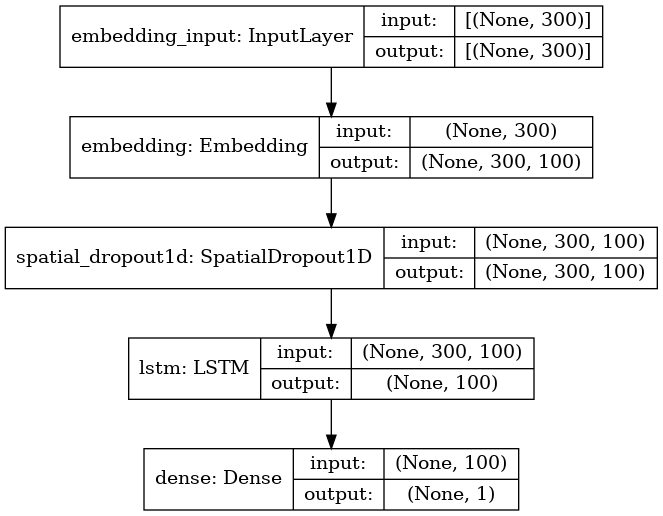

In [45]:
from tensorflow.keras.utils import plot_model
plot_model(modelAR,show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)

In [46]:
early = EarlyStopping(monitor='val_loss', mode='min', patience=4)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

checkpoint= ModelCheckpoint(
    filepath='./',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

callbacks_list = [ early, learning_rate_reduction,checkpoint]

In [47]:
batch_size = 1024
epochs = 10
validation_split = 0.2

historyEN = modelEN.fit(sequences_matrix,
                  y_trainEN,
                  batch_size=batch_size,
                  epochs=epochs,
                  validation_split=validation_split,
                  callbacks=callbacks_list)

2022-06-01 21:33:09.598867: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
34/34 [==============================] - 209s 6s/step - loss: 0.5143 - accuracy: 0.7472 - val_loss: 0.3033 - val_accuracy: 0.9020
Epoch 2/10
34/34 [==============================] - 205s 6s/step - loss: 0.2231 - accuracy: 0.9258 - val_loss: 0.2150 - val_accuracy: 0.9227
Epoch 3/10
34/34 [==============================] - 203s 6s/step - loss: 0.1396 - accuracy: 0.9527 - val_loss: 0.1645 - val_accuracy: 0.9443
Epoch 4/10
34/34 [==============================] - 207s 6s/step - loss: 0.1042 - accuracy: 0.9638 - val_loss: 0.1557 - val_accuracy: 0.9447
Epoch 5/10
34/34 [==============================] - 200s 6s/step - loss: 0.0836 - accuracy: 0.9711 - val_loss: 0.1694 - val_accuracy: 0.9373
Epoch 6/10
34/34 [==============================] - 199s 6s/step - loss: 0.0706 - accuracy: 0.9761 - val_loss: 0.1688 - val_accuracy: 0.9429

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 7/10
34/34 [==============================] - 198s 6s/step - loss: 

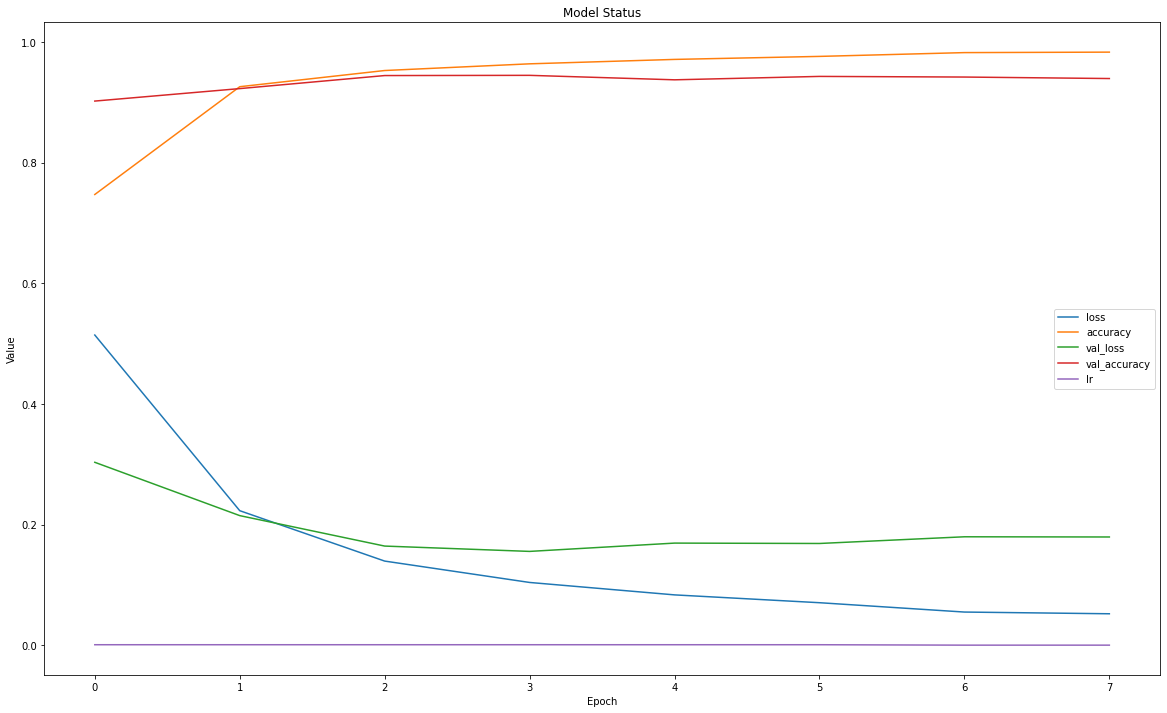

In [48]:
pd.DataFrame(historyEN.history).plot(figsize=(20, 12))
plt.title('Model Status')
plt.ylabel('Value')
plt.xlabel('Epoch');

In [49]:
modelEN.save("Hate&Abusive_ModelEN.h5")

<a id='perf'></a>
## Model Performance

<a id='preformancenglish'></a>
### English DataSet

In [50]:
test_sequences = tokenizerEN.texts_to_sequences(x_testEN)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [51]:
test_accu = modelEN.evaluate(test_sequences_matrix,y_testEN)
print('The testing accuracy is :',test_accu[1]*100, '%')

444/444 [==============================] - 98s 221ms/step - loss: 0.1991 - accuracy: 0.9356
The testing accuracy is : 93.55748295783997 %


In [52]:
lstm_prediction = modelEN.predict(test_sequences_matrix)

In [53]:
y_pred = []
for prediction in lstm_prediction:
    if prediction[0]<0.5:
        y_pred.append(0)
    else:
        y_pred.append(1)

444/444 [==============================] - 102s 229ms/step - loss: 0.1991 - accuracy: 0.9356
The testing accuracy is : 93.55748295783997 %
confusion matrix :
 [[8012  441]
 [ 473 5261]]
Precision Score :  0.9355748220201593
Recall Score :  0.9355748220201593
classification_report :
               precision    recall  f1-score   support

           0       0.94      0.95      0.95      8453
           1       0.92      0.92      0.92      5734

    accuracy                           0.94     14187
   macro avg       0.93      0.93      0.93     14187
weighted avg       0.94      0.94      0.94     14187



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


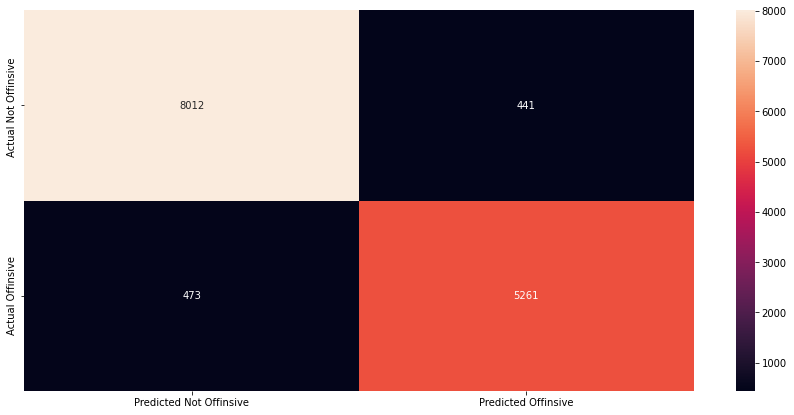

In [54]:
y_true = y_testEN

plt.figure(figsize = (15,7))

cm = pd.DataFrame(data=confusion_matrix(y_true, y_pred, labels=[0, 1]),
                  index=["Actual Not Offinsive ", "Actual Offinsive"],
columns=["Predicted Not Offinsive", "Predicted Offinsive"])

sns.heatmap(cm,annot=True,fmt="d");

test_accuracy = modelEN.evaluate(test_sequences_matrix,y_testEN)
print('The testing accuracy is :',test_accuracy[1]*100, '%')
print('confusion matrix :\n',confusion_matrix(y_true,y_pred))
print("Precision Score : ",precision_score(y_true, y_pred, pos_label='positive',average='micro'))
print("Recall Score : ",recall_score(y_true, y_pred, pos_label='positive',average='micro'))
print('classification_report :\n',classification_report(y_true,y_pred))

In [55]:
text = 'i hate you and i will kill you in the future'
text=[clean_text(text)]
print("pred", text)
seq = tokenizerEN.texts_to_sequences(text)
padded = sequence.pad_sequences(seq, maxlen=300)
pred = modelEN.predict(padded)
print("pred", pred)
if pred<0.5:
    print("no hate")
else:
    print("hate and abusive")

pred ['hate kill future']
pred [[0.8596651]]
hate and abusive


### Save Model Component

In [56]:
with open('tokenizerEN.pickle', 'wb') as handle:
    pickle.dump(tokenizerEN, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
with open('tokenizerEN.pickle', 'rb') as handle:
    load_tokenizer = pickle.load(handle)
    
with open( './word_dictEN.json' , 'w' ) as file:
    json.dump( tokenizerEN.word_index , file)

<a id='tensor'></a>
## Convert Model Keras To TensorFlow

<a id='convertenglish'></a>
### English DataSet

In [57]:
from tensorflow import keras
from tensorflow import lite
saved_model_dir = './Hate&Abusive_ModelEN.h5'
model = keras.models.load_model(saved_model_dir)
converter = lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("Hate&Abusive_ModelEN.tflite","wb").write(tflite_model)

2022-06-01 22:17:07.265476: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
2022-06-01 22:17:09.640658: I tensorflow/core/grappler/devices.cc:75] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0 (Note: TensorFlow was not compiled with CUDA or ROCm support)
2022-06-01 22:17:09.640977: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2022-06-01 22:17:09.658652: I tensorflow/core/grappler/optimizers/meta_optimizer.cc:1137] Optimization results for grappler item: graph_to_optimize
  function_optimizer: Graph size after: 127 nodes (0), 167 edges (0), time = 2.234ms.
  function_optimizer: Graph size after: 127 nodes (0), 167 edges (0), time = 2.191ms.
Optimization results for grappler item: sequential_lstm_while_body_13485
  function_optimizer: function_optimizer did nothing. time = 0.008ms.
  function_optimizer: function_optimizer did n

20456220

In [58]:
import tensorflow as tf

interpreter = tf.lite.Interpreter(model_path="./Hate&Abusive_ModelEN.tflite")
interpreter.allocate_tensors()

# Print input shape and type
inputs = interpreter.get_input_details()
print('{} input(s):'.format(len(inputs)))
for i in range(0, len(inputs)):
    print('{} {}'.format(inputs[i]['shape'], inputs[i]['dtype']))

# Print output shape and type
outputs = interpreter.get_output_details()
print('\n{} output(s):'.format(len(outputs)))
for i in range(0, len(outputs)):
    print('{} {}'.format(outputs[i]['shape'], outputs[i]['dtype']))

1 input(s):
[  1 300] <class 'numpy.float32'>

1 output(s):
[1 1] <class 'numpy.float32'>


<a id='concl'></a>
## Conclusions

> The main focus of NLP project is for detection of offensive and abusive language in online communication conducted so far is mainly for English. There is no much attention being paid to the same problem in Arabic. 
> In this project, we conduct machine learning experiments with a dataset of YouTube, twitter, and other platforms comments in English. To the best of our knowledge, our dataset is the largest dataset of English text specifically designed for training predictive models for detection of offensive language in online communication.
